In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2.5)

import missingno as msno #null data 쉽게 확인 가능

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
df_train = pd.read_csv('../input/titanic/train.csv')
df_test = pd.read_csv('../input/titanic/test.csv')

In [4]:
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
df_train.describe() # column별로 통계

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
for col in df_train.columns:
    msg='column {:<10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)

column PassengerId	 Percent of NaN value: 0.00%
column Survived  	 Percent of NaN value: 0.00%
column Pclass    	 Percent of NaN value: 0.00%
column Name      	 Percent of NaN value: 0.00%
column Sex       	 Percent of NaN value: 0.00%
column Age       	 Percent of NaN value: 19.87%
column SibSp     	 Percent of NaN value: 0.00%
column Parch     	 Percent of NaN value: 0.00%
column Ticket    	 Percent of NaN value: 0.00%
column Fare      	 Percent of NaN value: 0.00%
column Cabin     	 Percent of NaN value: 77.10%
column Embarked  	 Percent of NaN value: 0.22%


<AxesSubplot:>

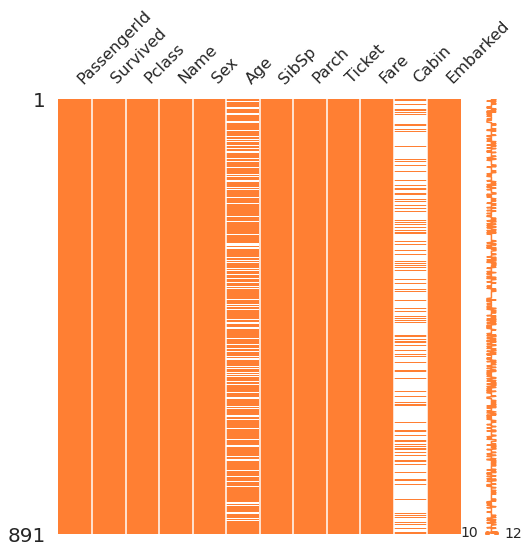

In [7]:
msno.matrix(df=df_train.iloc[:,:],figsize=[8,8], color=(1.0,0.5,0.2))

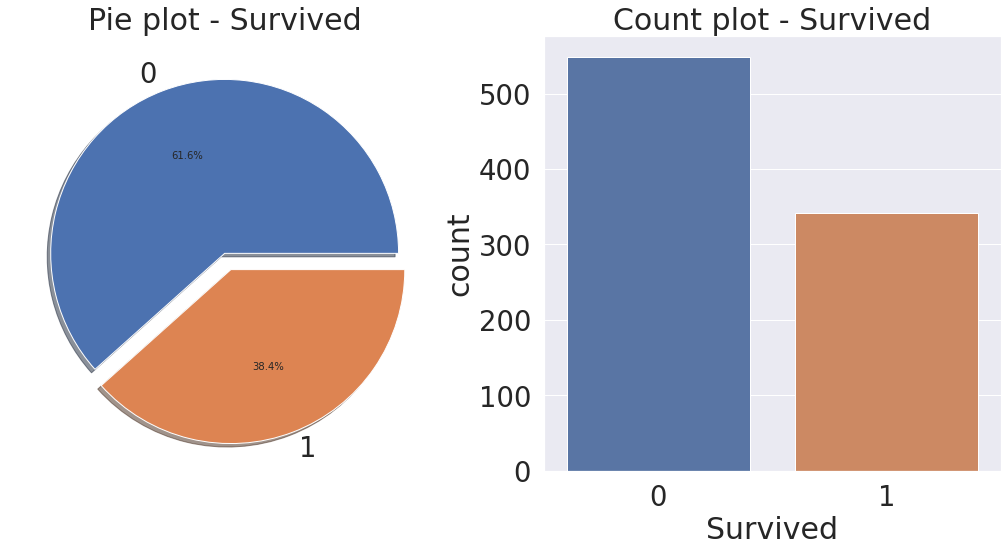

In [8]:
# 표 레이아웃 만듦
f, ax =plt.subplots(1,2,figsize=(18,8))

# Survived 데이터를  pie plot 방식으로, count plot으로 만들어 볼 것

# 왼쪽 표 .value_counts().plot.pie(파이디자인)
df_train['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')

# 오른쪽 표 countplot
sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

# 만든 표 보여줌
plt.show()

2.1 Pclass

In [9]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [10]:
# Pclass별로 사람들의 수
df_train[['Pclass', 'Survived']].groupby('Pclass').count()

,Survived
Pclass,
1,216
2,184
3,491


In [11]:
# Pclass 별로 살아남은 사람들의 수 (sum)

df_train[['Pclass', 'Survived']].groupby('Pclass').sum()

,Survived
Pclass,
1,136
2,87
3,119


In [12]:
# 여기서 1이 위에 sum이고 All이 count
# margin은 All이 있는지 없는지 차이
# cmap (color map)으로 색깔 변경 가능
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins = True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


<AxesSubplot:xlabel='Pclass'>

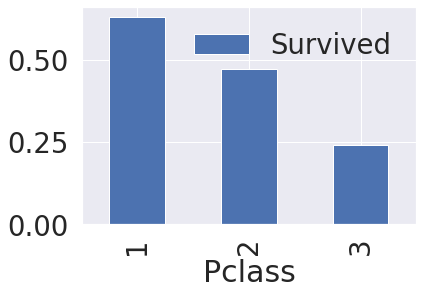

In [13]:
# 각 클래스별로 생존율 구해보기
# 하나의 그래프로 그리려면 as_index = True 해줘야 함
# ascending = False -> 내림차순
# bar() -> 막대 그래프

# class가 높을수록 생존율이 높은 것을 확인할 수 있음
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()

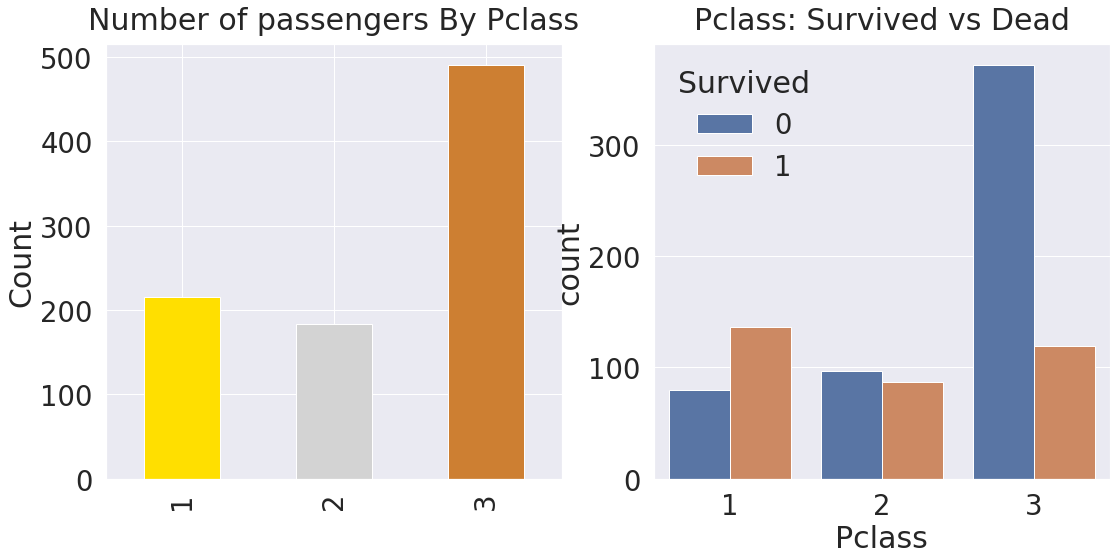

In [14]:
# 다른 방식으로 그래프로 표현하기
# 표 짜기
y_position = 1.02
f, ax = plt.subplots(1,2, figsize=(18, 8))

# 왼쪽 표 만들기 (Pclass별 사람 수)
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32', '#FFDF00', '#D3D3D3'], ax = ax[0])
ax[0].set_title('Number of passengers By Pclass', y=y_position)
ax[0].set_ylabel('Count')

# 오른쪽 표 만들기 (pclass별 survived/dead 수 그래프로) Survived를 기준으로 hue 지정
sns.countplot('Pclass', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)

plt.show()

# -> 마찬가지로 class가 높을 수록 생존확률이 높음 -> input으로 pclass를 사용하면 좋을 것임을 알 수 있음


2.2 Sex

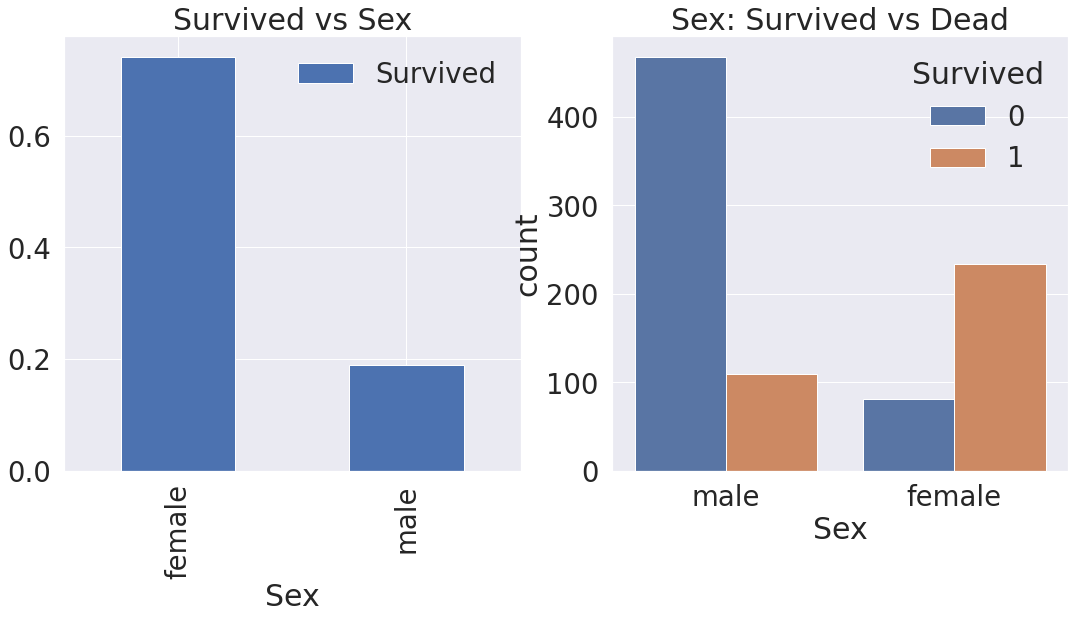

In [15]:
f, ax = plt.subplots(1, 2, figsize=(18,8))
df_train[['Sex',"Survived"]].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

In [16]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [17]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


2.2 Both Sex and Pclass

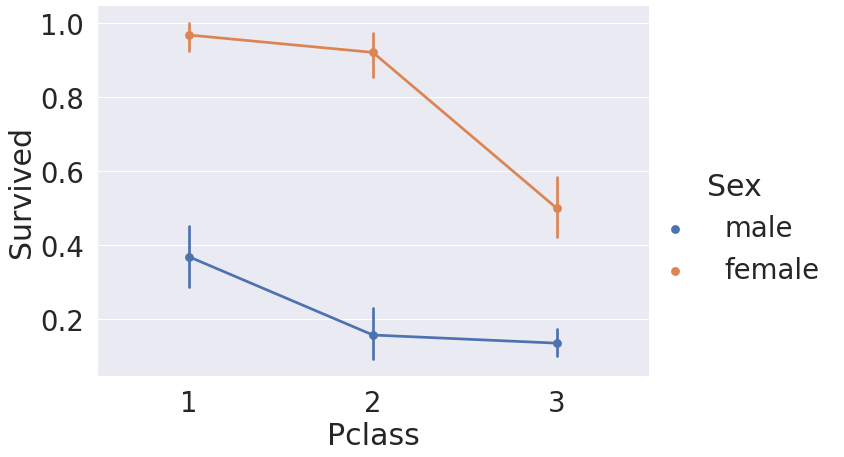

In [18]:
sns.factorplot('Pclass', 'Survived', hue="Sex", data=df_train, size=6, aspect=1.5)
# female일수록, class가 높을수록 survive 확률이 높은 것을 알 수 있음
# Error Bar

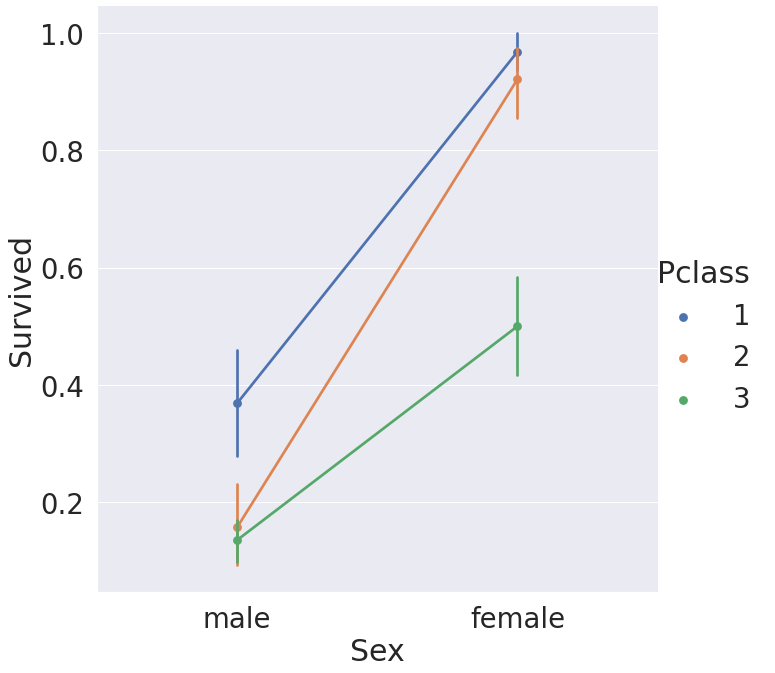

In [19]:
sns.factorplot(x='Sex', y='Survived', hue='Pclass', data=df_train, saturation=.5, size=9, aspect=1)

Age

In [20]:
print("제일 나이 많은 탑승객 : {:.1f} years".format(df_train['Age'].max()))
print("제일 어린 탑승객 : {:.1f} years".format(df_train['Age'].min()))
print("탑승객 평균 나이 : {:.1f} years".format(df_train['Age'].mean()))

제일 나이 많은 탑승객 : 80.0 years
제일 어린 탑승객 : 0.4 years
탑승객 평균 나이 : 29.7 years


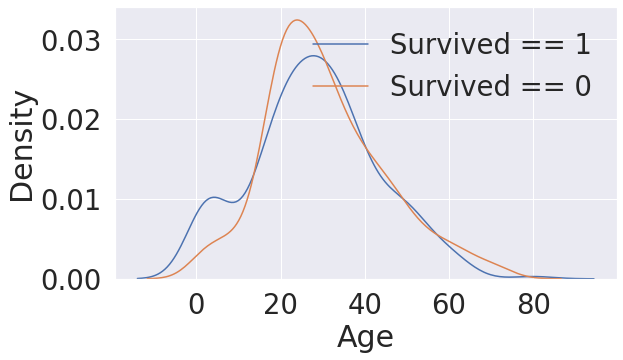

In [21]:
# Kernel Dense Estimation
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

<AxesSubplot:>

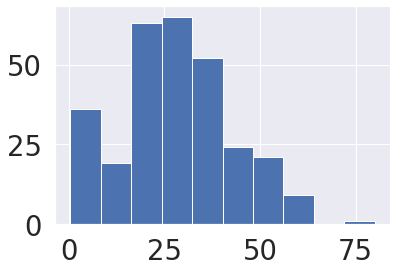

In [22]:
# 히스토그램
df_train[df_train['Survived'] == 1]['Age'].hist()

In [23]:
df_train.iloc[2, :]

PassengerId                         3
Survived                            1
Pclass                              3
Name           Heikkinen, Miss. Laina
Sex                            female
Age                            26.000
SibSp                               0
Parch                               0
Ticket               STON/O2. 3101282
Fare                            7.925
Cabin                             NaN
Embarked                            S
Name: 2, dtype: object

In [24]:
for row in df_train.iterrows():
    break
row

(0,
 PassengerId                          1
 Survived                             0
 Pclass                               3
 Name           Braund, Mr. Owen Harris
 Sex                               male
 Age                              22.00
 SibSp                                1
 Parch                                0
 Ticket                       A/5 21171
 Fare                              7.25
 Cabin                              NaN
 Embarked                             S
 Name: 0, dtype: object)

In [25]:
df_train[df_train['Survived'] == 1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


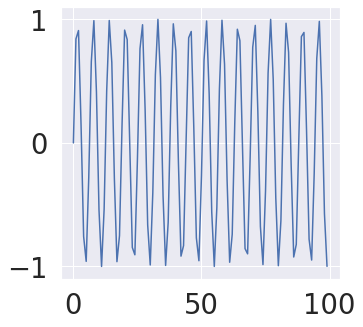

In [26]:
# 방법1
f, ax = plt.subplots(1,1, figsize =(5,5))
a = np.arange(100)
b = np.sin(a)
ax.plot(b)

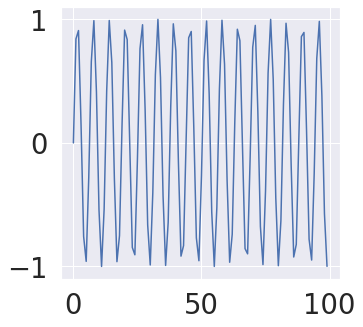

In [27]:
# 방법2
plt.figure(figsize=(5,5))
a = np.arange(100)
b = np.sin(a)

plt.plot(b)

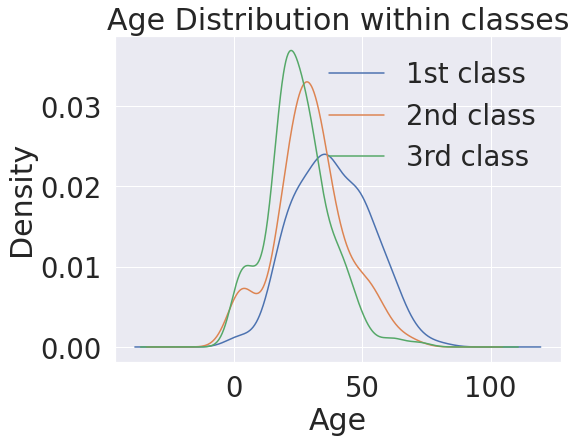

In [28]:
# age별 class분포
plt.figure(figsize=(8,6))
df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='kde')
# kind = hist로 하면 겹쳐서 안 보임..!

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st class', '2nd class', '3rd class'])

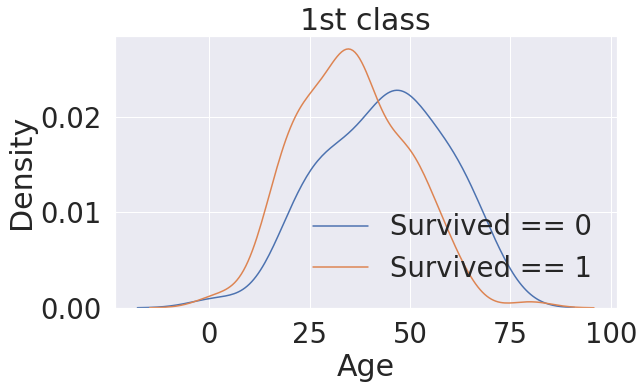

In [35]:
# class내에서 age별 survive 분포
fig, ax =plt.subplots(1,1,figsize=(9,5))
sns.kdeplot(df_train[(df_train['Survived'] == 0) & (df_train['Pclass'] == 1)]['Age'], ax=ax)
sns.kdeplot(df_train[(df_train['Survived'] == 1) & (df_train['Pclass'] == 1)]['Age'], ax=ax)
plt.legend(['Survived == 0', 'Survived == 1'])
plt.title('1st class')
plt.show()

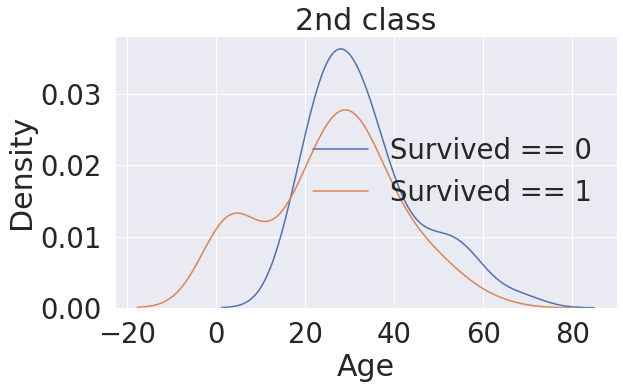

In [38]:
fig, ax =plt.subplots(1,1,figsize=(9,5))
sns.kdeplot(df_train[(df_train['Survived'] == 0) & (df_train['Pclass'] == 2)]['Age'], ax=ax)
sns.kdeplot(df_train[(df_train['Survived'] == 1) & (df_train['Pclass'] == 2)]['Age'], ax=ax)
plt.legend(['Survived == 0', 'Survived == 1'])
plt.title('2nd class')
plt.show()

# 추정시키다보니 -값이 있는 것 (히스토그램으로 보면 없음)

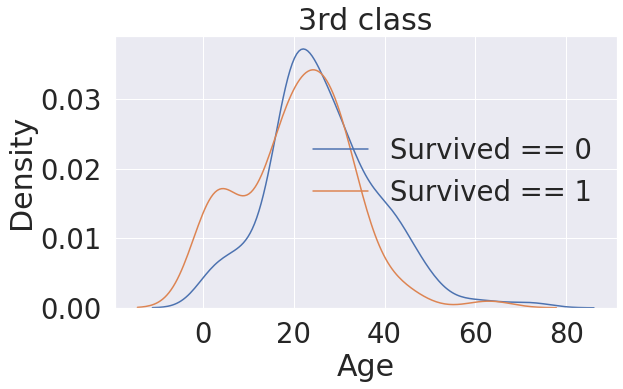

In [39]:
fig, ax =plt.subplots(1,1,figsize=(9,5))
sns.kdeplot(df_train[(df_train['Survived'] == 0) & (df_train['Pclass'] == 3)]['Age'], ax=ax)
sns.kdeplot(df_train[(df_train['Survived'] == 1) & (df_train['Pclass'] == 3)]['Age'], ax=ax)
plt.legend(['Survived == 0', 'Survived == 1'])
plt.title('3rd class')
plt.show()

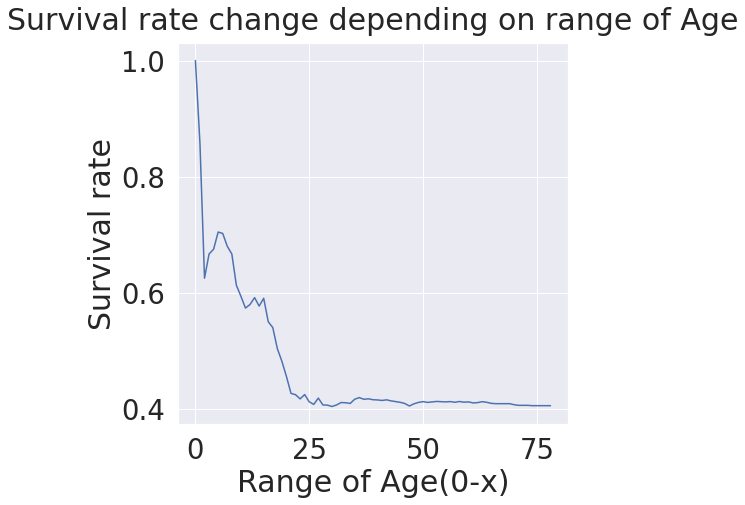

In [51]:
# 나이별 생존확률 확인해보기

change_age_range_survival_ratio = []
for i in range(1, 80):
    change_age_range_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].mean())

plt.figure(figsize=(7, 7))
plt.plot(change_age_range_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0-x)')
plt.show()

# -> 나이가 어릴수록 생존 확률이 높은 것을 알 수 있음